<img src="Header.png" align="left" style="width: 600px; height: 170px"/>

# Bike Sharing Demand

El sistema de bicicletas compartidas de Washington, requiere estimar la demanda de uso en las diferentes estaciones del  año, a través de patrones de uso históricos con datos meteorológicos, con el fin de poder:

* Presupuestar los recursos 
* Dimensionar logística de funcionamiento 
* Estimar reparaciones 
* Proyectar ingresos
 
El siguiente documento muestra el procediento de contruccion de un modelo que permitaestiar la demanda.

## Importación de Librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Cargue de datos train y test

In [2]:
train = pd.read_csv("./Datos/train.csv")
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


## Depuración de la base de Entrenamiento

#### Modificación de los Tipos de Variables

In [3]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

A continuación se modificarán los tipos de variables.

In [4]:
from datetime import datetime

# Convertir a fecha hora
train['datetime'] = train['datetime'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

# Asignar niveles a los factores
train["season"] = train.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
train["weather"] = train.weather.map({1: " Clear+Few_clouds +Partly_cloudy+Partly_cloudy",\
                                        2 : "Mist+Cloudy,Mist+Broken_clouds,Mist+Few_clouds,Mist", \
                                        3 : "Light_Snow,Light_Rain+Thunderstorm+Scattered_clouds,Light_Rain+Scattered_clouds", \
                                        4 :"Heavy_Rain+Ice_Pallets+Thunderstorm+Mist,Snow+Fog" })

# Convertir a categorias
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
train["holiday"] = train["holiday"].astype("category")
train["workingday"] = train["workingday"].astype("category")

train.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

### Construcción de Variables asociadas a la fecha

In [5]:
train['Date']=train["datetime"].dt.date
train['Hour']=train["datetime"].dt.hour
train['Weekday']=train["datetime"].dt.weekday
train['Month']=train["datetime"].dt.month
train['Year']=train["datetime"].dt.year

train["Hour"] = train["Hour"].astype("category")
train["Weekday"] = train["Weekday"].astype("category")
train["Month"] = train["Month"].astype("category")
train["Year"] = train["Year"].astype("category")

### Eliminación de Variables innecesarias

In [6]:
train  = train.drop(["datetime", "casual", "registered" ],axis=1)
# Las variables casual y registered no estan en la base de test, adicionalmente, 
# la suma de dichas variables corresponde a la variable objetivo
train.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,Date,Hour,Weekday,Month,Year
0,Spring,0,0,Clear+Few_clouds +Partly_cloudy+Partly_cloudy,9.84,14.395,81,0.0,16,2011-01-01,0,5,1,2011
1,Spring,0,0,Clear+Few_clouds +Partly_cloudy+Partly_cloudy,9.02,13.635,80,0.0,40,2011-01-01,1,5,1,2011
2,Spring,0,0,Clear+Few_clouds +Partly_cloudy+Partly_cloudy,9.02,13.635,80,0.0,32,2011-01-01,2,5,1,2011


## Análisis Exploratorio

### Valores Ausentes

In [7]:
train.apply(lambda x: x.isnull().sum(), axis=0)

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
Date          0
Hour          0
Weekday       0
Month         0
Year          0
dtype: int64

En la base de datos no se encuentran valores ausentes en ninguna de las variables.

### Análisis Exploratorio

##### Variables Categóricas

[Text(0,0.5,'Count'), Text(0.5,1,'Year')]

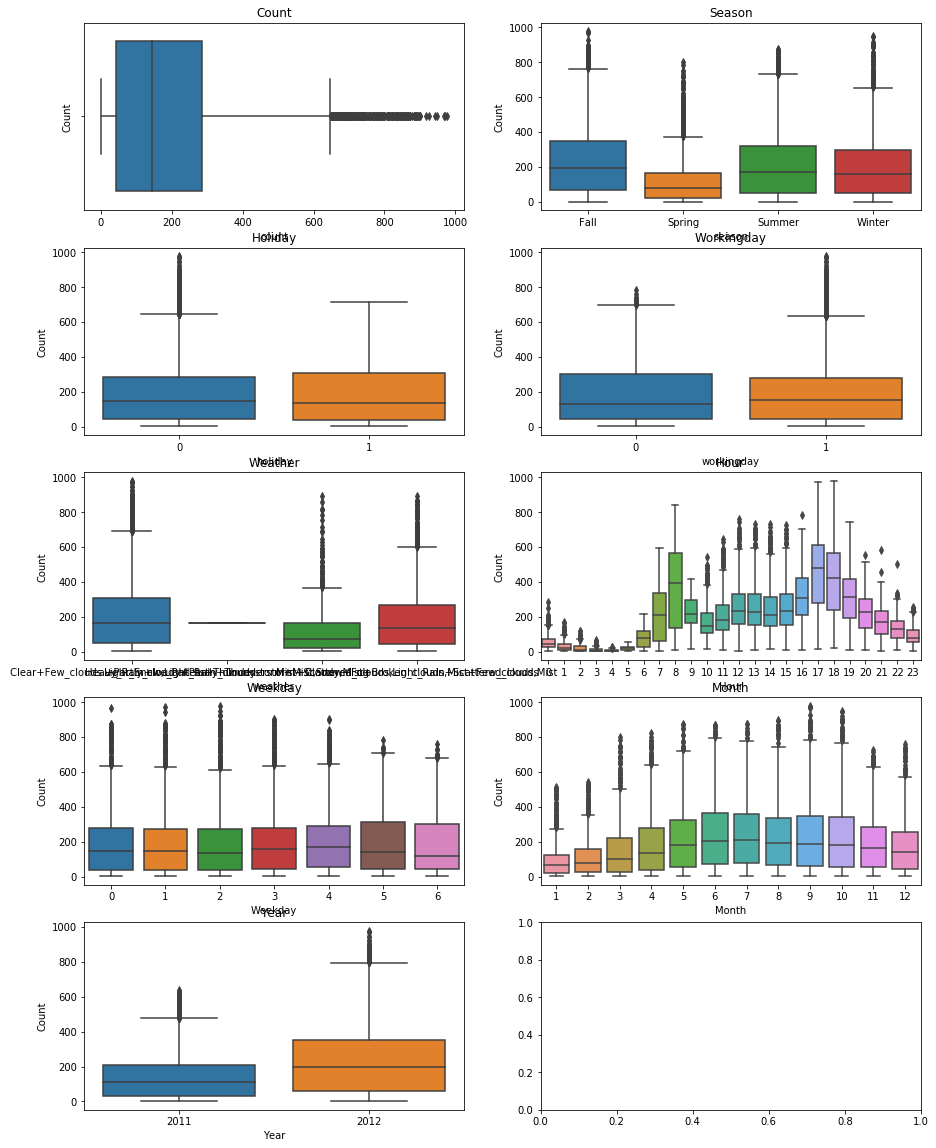

In [8]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(15, 20)
sns.boxplot(data=train,y="count",orient="h",ax=axes[0][0])
sns.boxplot(data=train,y="count",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=train,y="count",x="holiday",orient="v",ax=axes[1][0])
sns.boxplot(data=train,y="count",x="workingday",orient="v",ax=axes[1][1])
sns.boxplot(data=train,y="count",x="weather",orient="v",ax=axes[2][0])
sns.boxplot(data=train,y="count",x="Hour",orient="v",ax=axes[2][1])
sns.boxplot(data=train,y="count",x="Weekday",orient="v",ax=axes[3][0])
sns.boxplot(data=train,y="count",x="Month",orient="v",ax=axes[3][1])
sns.boxplot(data=train,y="count",x="Year",orient="v",ax=axes[4][0])

axes[0][0].set(ylabel='Count',title="Count")
axes[0][1].set(ylabel='Count',title="Season")
axes[1][0].set(ylabel='Count',title="Holiday")
axes[1][1].set(ylabel='Count',title="Workingday")
axes[2][0].set(ylabel='Count',title="Weather")
axes[2][1].set(ylabel='Count',title="Hour")
axes[3][0].set(ylabel='Count',title="Weekday")
axes[3][1].set(ylabel='Count',title="Month")
axes[4][0].set(ylabel='Count',title="Year")

##### Variables Numéricas

[Text(0.5,1,'Count vs windspeed')]

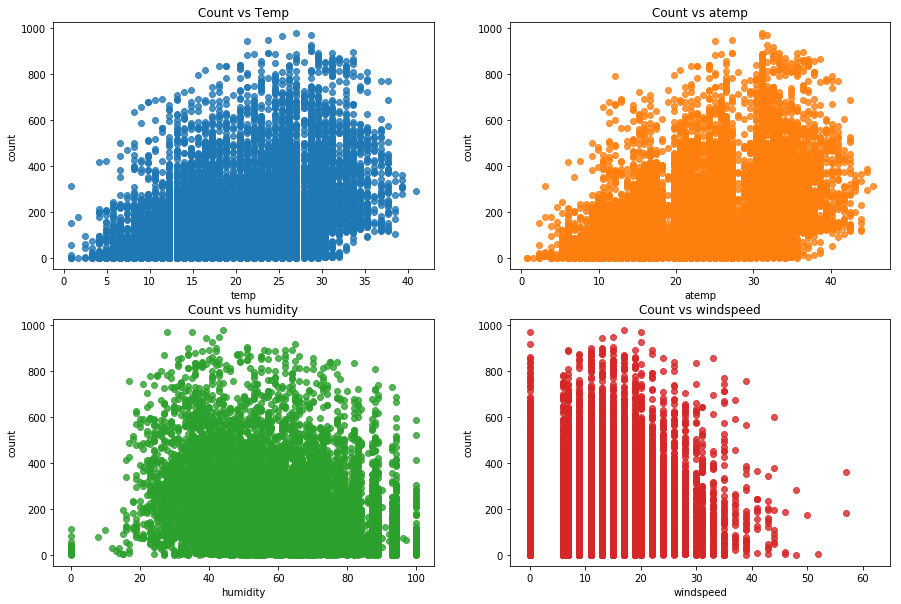

In [9]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15, 10)

sns.regplot(x=train["temp"], y=train["count"], fit_reg=False, ax=axes[0][0])
sns.regplot(x=train["atemp"], y=train["count"], fit_reg=False,ax=axes[0][1])
sns.regplot(x=train["humidity"], y=train["count"], fit_reg=False,ax=axes[1][0])
sns.regplot(x=train["windspeed"], y=train["count"], fit_reg=False,ax=axes[1][1])

axes[0][0].set(title="Count vs Temp")
axes[0][1].set(title="Count vs atemp")
axes[1][0].set(title="Count vs humidity")
axes[1][1].set(title="Count vs windspeed")

In [10]:
train.dtypes

season        category
holiday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
count            int64
Date            object
Hour          category
Weekday       category
Month         category
Year          category
dtype: object

##### Correlación entre Variables

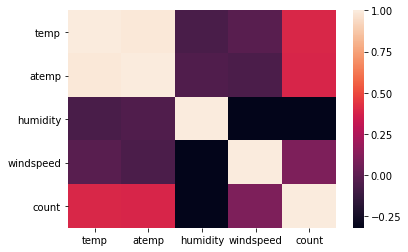

In [11]:
sns.heatmap(train.corr())

In [12]:
train.corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


Las variables **temp** y **atemp** tine una correlación de *0.9849* por lo cual se decide eliminar la variable **atemp**.

In [13]:
train  = train.drop(["atemp"],axis=1)
train.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,count,Date,Hour,Weekday,Month,Year
0,Spring,0,0,Clear+Few_clouds +Partly_cloudy+Partly_cloudy,9.84,81,0.0,16,2011-01-01,0,5,1,2011
1,Spring,0,0,Clear+Few_clouds +Partly_cloudy+Partly_cloudy,9.02,80,0.0,40,2011-01-01,1,5,1,2011
2,Spring,0,0,Clear+Few_clouds +Partly_cloudy+Partly_cloudy,9.02,80,0.0,32,2011-01-01,2,5,1,2011
3,Spring,0,0,Clear+Few_clouds +Partly_cloudy+Partly_cloudy,9.84,75,0.0,13,2011-01-01,3,5,1,2011
4,Spring,0,0,Clear+Few_clouds +Partly_cloudy+Partly_cloudy,9.84,75,0.0,1,2011-01-01,4,5,1,2011


In [14]:
season_df=pd.get_dummies(train['season'],prefix='s',drop_first=True)
weather_df=pd.get_dummies(train['weather'],prefix='w',drop_first=True)
hour_df=pd.get_dummies(train['Hour'],prefix='h',drop_first=True)
weekday_df=pd.get_dummies(train['Weekday'],prefix='wd',drop_first=True)
month_df=pd.get_dummies(train['Month'],prefix='m',drop_first=True)
year_df=pd.get_dummies(train['Year'],prefix='y',drop_first=True)

train=train.join(season_df)
train=train.join(weather_df)
train=train.join(hour_df)
train=train.join(weekday_df)
train=train.join(month_df)                     
train=train.join(year_df)

In [15]:
train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity',
       'windspeed', 'count', 'Date', 'Hour', 'Weekday', 'Month', 'Year',
       's_Spring', 's_Summer', 's_Winter',
       'w_Heavy_Rain+Ice_Pallets+Thunderstorm+Mist,Snow+Fog',
       'w_Light_Snow,Light_Rain+Thunderstorm+Scattered_clouds,Light_Rain+Scattered_clouds',
       'w_Mist+Cloudy,Mist+Broken_clouds,Mist+Few_clouds,Mist', 'h_1', 'h_2',
       'h_3', 'h_4', 'h_5', 'h_6', 'h_7', 'h_8', 'h_9', 'h_10', 'h_11', 'h_12',
       'h_13', 'h_14', 'h_15', 'h_16', 'h_17', 'h_18', 'h_19', 'h_20', 'h_21',
       'h_22', 'h_23', 'wd_1', 'wd_2', 'wd_3', 'wd_4', 'wd_5', 'wd_6', 'm_2',
       'm_3', 'm_4', 'm_5', 'm_6', 'm_7', 'm_8', 'm_9', 'm_10', 'm_11', 'm_12',
       'y_2012'],
      dtype='object')

## Modelos

### Partición Train / Test

In [16]:
train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity',
       'windspeed', 'count', 'Date', 'Hour', 'Weekday', 'Month', 'Year',
       's_Spring', 's_Summer', 's_Winter',
       'w_Heavy_Rain+Ice_Pallets+Thunderstorm+Mist,Snow+Fog',
       'w_Light_Snow,Light_Rain+Thunderstorm+Scattered_clouds,Light_Rain+Scattered_clouds',
       'w_Mist+Cloudy,Mist+Broken_clouds,Mist+Few_clouds,Mist', 'h_1', 'h_2',
       'h_3', 'h_4', 'h_5', 'h_6', 'h_7', 'h_8', 'h_9', 'h_10', 'h_11', 'h_12',
       'h_13', 'h_14', 'h_15', 'h_16', 'h_17', 'h_18', 'h_19', 'h_20', 'h_21',
       'h_22', 'h_23', 'wd_1', 'wd_2', 'wd_3', 'wd_4', 'wd_5', 'wd_6', 'm_2',
       'm_3', 'm_4', 'm_5', 'm_6', 'm_7', 'm_8', 'm_9', 'm_10', 'm_11', 'm_12',
       'y_2012'],
      dtype='object')

In [17]:
from sklearn.model_selection import train_test_split

train=train.rename(columns={'count': 'y'}) # Es necesario cambiar el nombre de count, para que no lo tome como funcion.

# Definir X y y
feature_cols = ['s_Spring', 's_Summer', 's_Winter', 'holiday', 'workingday', 
                'w_Heavy_Rain+Ice_Pallets+Thunderstorm+Mist,Snow+Fog',
                'w_Light_Snow,Light_Rain+Thunderstorm+Scattered_clouds,Light_Rain+Scattered_clouds',
                'w_Mist+Cloudy,Mist+Broken_clouds,Mist+Few_clouds,Mist',
                'temp', 'humidity', 'windspeed','h_1', 'h_2','h_3', 'h_4', 'h_5', 'h_6', 'h_7', 'h_8', 'h_9', 
                'h_10', 'h_11', 'h_12','h_13', 'h_14', 'h_15', 'h_16', 'h_17', 'h_18', 'h_19', 'h_20', 'h_21',
                'h_22', 'h_23', 'wd_1', 'wd_2', 'wd_3', 'wd_4', 'wd_5', 'wd_6', 'm_2','m_3', 'm_4', 'm_5', 'm_6', 
                'm_7', 'm_8', 'm_9', 'm_10', 'm_11', 'm_12','y_2012']
X = train[feature_cols]
y = train.y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31415)

### Regresión Lineal

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
logreg = LinearRegression()
results = cross_val_score(logreg, X, y, cv=10, scoring='neg_mean_squared_error')
logreg.fit(X = X,y = y)

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
pd.Series(-results).describe()

count    1.000000e+01
mean     4.963645e+18
std      1.569642e+19
min      6.274530e+03
25%      6.998601e+03
50%      1.126519e+04
75%      1.648411e+04
max      4.963645e+19
dtype: float64

### Random Forest

In [20]:
from sklearn.ensemble import RandomForestRegressor
RF_reg = RandomForestRegressor(n_estimators=1000)
results = cross_val_score(RF_reg, X, y, cv=10, scoring='neg_mean_squared_error')
RF_reg.fit(X = X,y = y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [21]:
pd.Series(-results).describe()

count       10.000000
mean      5506.990878
std       2631.866762
min       2485.736933
25%       3412.331104
50%       4970.442563
75%       7343.393593
max      10179.159714
dtype: float64

### Gradient Boost

In [22]:
from sklearn.ensemble import GradientBoostingRegressor
gbm_reg = GradientBoostingRegressor(n_estimators=4000,alpha=0.01)
results = cross_val_score(gbm_reg, X, y, cv=10, scoring='neg_mean_squared_error')
gbm_reg.fit(X = X,y = y)

GradientBoostingRegressor(alpha=0.01, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=4000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [23]:
pd.Series(-results).describe()

count      10.000000
mean     2880.143401
std      1193.675418
min      1555.781455
25%      2071.307274
50%      2380.392274
75%      3872.349399
max      4793.726270
dtype: float64

## Calificación de la base de test

In [24]:
test = pd.read_csv("./Datos/test.csv")

# Convertir a fecha hora
test['datetime'] = test['datetime'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

# Asignar niveles a los factores
test["season"] = test.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
test["weather"] = test.weather.map({1: " Clear+Few_clouds +Partly_cloudy+Partly_cloudy",\
                                        2 : "Mist+Cloudy,Mist+Broken_clouds,Mist+Few_clouds,Mist", \
                                        3 : "Light_Snow,Light_Rain+Thunderstorm+Scattered_clouds,Light_Rain+Scattered_clouds", \
                                        4 :"Heavy_Rain+Ice_Pallets+Thunderstorm+Mist,Snow+Fog" })

test['Date']=test["datetime"].dt.date
test['Hour']=test["datetime"].dt.hour
test['Weekday']=test["datetime"].dt.weekday
test['Month']=test["datetime"].dt.month
test['Year']=test["datetime"].dt.year

# Convertir a categorias
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")
test["holiday"] = test["holiday"].astype("category")
test["workingday"] = test["workingday"].astype("category")
test["Hour"] = test["Hour"].astype("category")
test["Weekday"] = test["Weekday"].astype("category")
test["Month"] = test["Month"].astype("category")
test["Year"] = test["Year"].astype("category")

In [25]:
# Creación de Dummies
season_df=pd.get_dummies(test['season'],prefix='s',drop_first=True)
weather_df=pd.get_dummies(test['weather'],prefix='w',drop_first=True)
hour_df=pd.get_dummies(test['Hour'],prefix='h',drop_first=True)
weekday_df=pd.get_dummies(test['Weekday'],prefix='wd',drop_first=True)
month_df=pd.get_dummies(test['Month'],prefix='m',drop_first=True)
year_df=pd.get_dummies(test['Year'],prefix='y',drop_first=True)

test=test.join(season_df)
test=test.join(weather_df)
test=test.join(hour_df)
test=test.join(weekday_df)
test=test.join(month_df)                     
test=test.join(year_df)

In [26]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'Date', 'Hour', 'Weekday', 'Month',
       'Year', 's_Spring', 's_Summer', 's_Winter',
       'w_Heavy_Rain+Ice_Pallets+Thunderstorm+Mist,Snow+Fog',
       'w_Light_Snow,Light_Rain+Thunderstorm+Scattered_clouds,Light_Rain+Scattered_clouds',
       'w_Mist+Cloudy,Mist+Broken_clouds,Mist+Few_clouds,Mist', 'h_1', 'h_2',
       'h_3', 'h_4', 'h_5', 'h_6', 'h_7', 'h_8', 'h_9', 'h_10', 'h_11', 'h_12',
       'h_13', 'h_14', 'h_15', 'h_16', 'h_17', 'h_18', 'h_19', 'h_20', 'h_21',
       'h_22', 'h_23', 'wd_1', 'wd_2', 'wd_3', 'wd_4', 'wd_5', 'wd_6', 'm_2',
       'm_3', 'm_4', 'm_5', 'm_6', 'm_7', 'm_8', 'm_9', 'm_10', 'm_11', 'm_12',
       'y_2012'],
      dtype='object')

In [27]:
feature_cols = ['s_Spring', 's_Summer', 's_Winter', 'holiday', 'workingday', 
                'w_Heavy_Rain+Ice_Pallets+Thunderstorm+Mist,Snow+Fog',
                'w_Light_Snow,Light_Rain+Thunderstorm+Scattered_clouds,Light_Rain+Scattered_clouds',
                'w_Mist+Cloudy,Mist+Broken_clouds,Mist+Few_clouds,Mist',
                'temp', 'humidity', 'windspeed','h_1', 'h_2','h_3', 'h_4', 'h_5', 'h_6', 'h_7', 'h_8', 'h_9', 
                'h_10', 'h_11', 'h_12','h_13', 'h_14', 'h_15', 'h_16', 'h_17', 'h_18', 'h_19', 'h_20', 'h_21',
                'h_22', 'h_23', 'wd_1', 'wd_2', 'wd_3', 'wd_4', 'wd_5', 'wd_6', 'm_2','m_3', 'm_4', 'm_5', 'm_6', 
                'm_7', 'm_8', 'm_9', 'm_10', 'm_11', 'm_12','y_2012']
Test_X = test[feature_cols]
FechaHora = test["datetime"]

In [28]:
Pred_test = gbm_reg.predict(X= Test_X)

## Exportación de archivo de respuesta

In [29]:
datetimecol=test['datetime']
submission = pd.DataFrame({
    "datetime": datetimecol,
    "count": [max(0, x) for x in Pred_test]
    })
submission.to_csv('Pred_GBM.csv', index=False, columns=['datetime', 'count'])

NameError: name 'datetimecol' is not defined